# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import Data

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\Eric\Desktop\Data Analytics\Data Immersion\Achievement 6'

In [4]:
df = pd.read_pickle(os.path.join(path,'Data','Prepared Data','04_df.pkl'))

# Explore Data

### Find which features I want to perform regression on

In [5]:
df.head()

,GeoFIPS,State,Year,Unemployed,Employed,Labor_Force,Area_Name,Dom_Mig,Int_Mig,Nat_Inc,...,GeoName,gov_retire_disability,gov_medical,gov_income,gov_unemployment,gov_veterans,gov_education,gov_other,unemp_rate,unemployment_category
2,0500000US01001,AL,2010,0.041407,0.428697,0.470104,Autauga,0.002684,0.000456,-0.000128,...,Autauga AL,2.389225,2.387655,0.766016,0.205357,0.436237,0.095868,0.241122,0.088081,High Unemployment
3,0500000US01003,AL,2010,0.045153,0.411131,0.456284,Baldwin,0.004271,0.000197,-0.000093,...,Baldwin AL,3.165718,2.684335,0.598306,0.222470,0.247843,0.236631,0.228707,0.098958,High Unemployment
4,0500000US01005,AL,2010,0.045413,0.328540,0.373953,Barbour,-0.002525,-0.000037,-0.002196,...,Barbour AL,2.825374,3.415084,1.319501,0.235042,0.316647,0.085447,0.211622,0.121440,High Unemployment
5,0500000US01007,AL,2010,0.043944,0.346786,0.390730,Bibb,-0.002580,0.000000,0.000525,...,Bibb AL,2.709488,3.028247,0.937473,0.228465,0.212549,0.087276,0.191474,0.112466,High Unemployment
6,0500000US01009,AL,2010,0.042160,0.392307,0.434467,Blount,0.000157,-0.000035,0.000924,...,Blount AL,2.780535,2.729469,0.746357,0.228423,0.195814,0.095876,0.205609,0.097039,High Unemployment


In [6]:
df.columns

Index(['GeoFIPS', 'State', 'Year', 'Unemployed', 'Employed', 'Labor_Force',
       'Area_Name', 'Dom_Mig', 'Int_Mig', 'Nat_Inc', 'Deaths', 'Births',
       'Pop_Change', 'Pop_Est', 'GeoName', 'gov_retire_disability',
       'gov_medical', 'gov_income', 'gov_unemployment', 'gov_veterans',
       'gov_education', 'gov_other', 'unemp_rate', 'unemployment_category'],
      dtype='object')

In [7]:
# Add a net migration column
df['Net_Mig'] = df['Dom_Mig']+df['Int_Mig']

In [8]:
df['Pop_Change'].head()

2    0.003213
3    0.004626
4   -0.004684
5   -0.001968
6    0.000941
Name: Pop_Change, dtype: float64

In [9]:
sub_df = df[[
    'Unemployed',
    'Net_Mig',
    'Nat_Inc',
    'Pop_Change',
    'gov_medical',
    'gov_unemployment',
    'gov_veterans'
]]

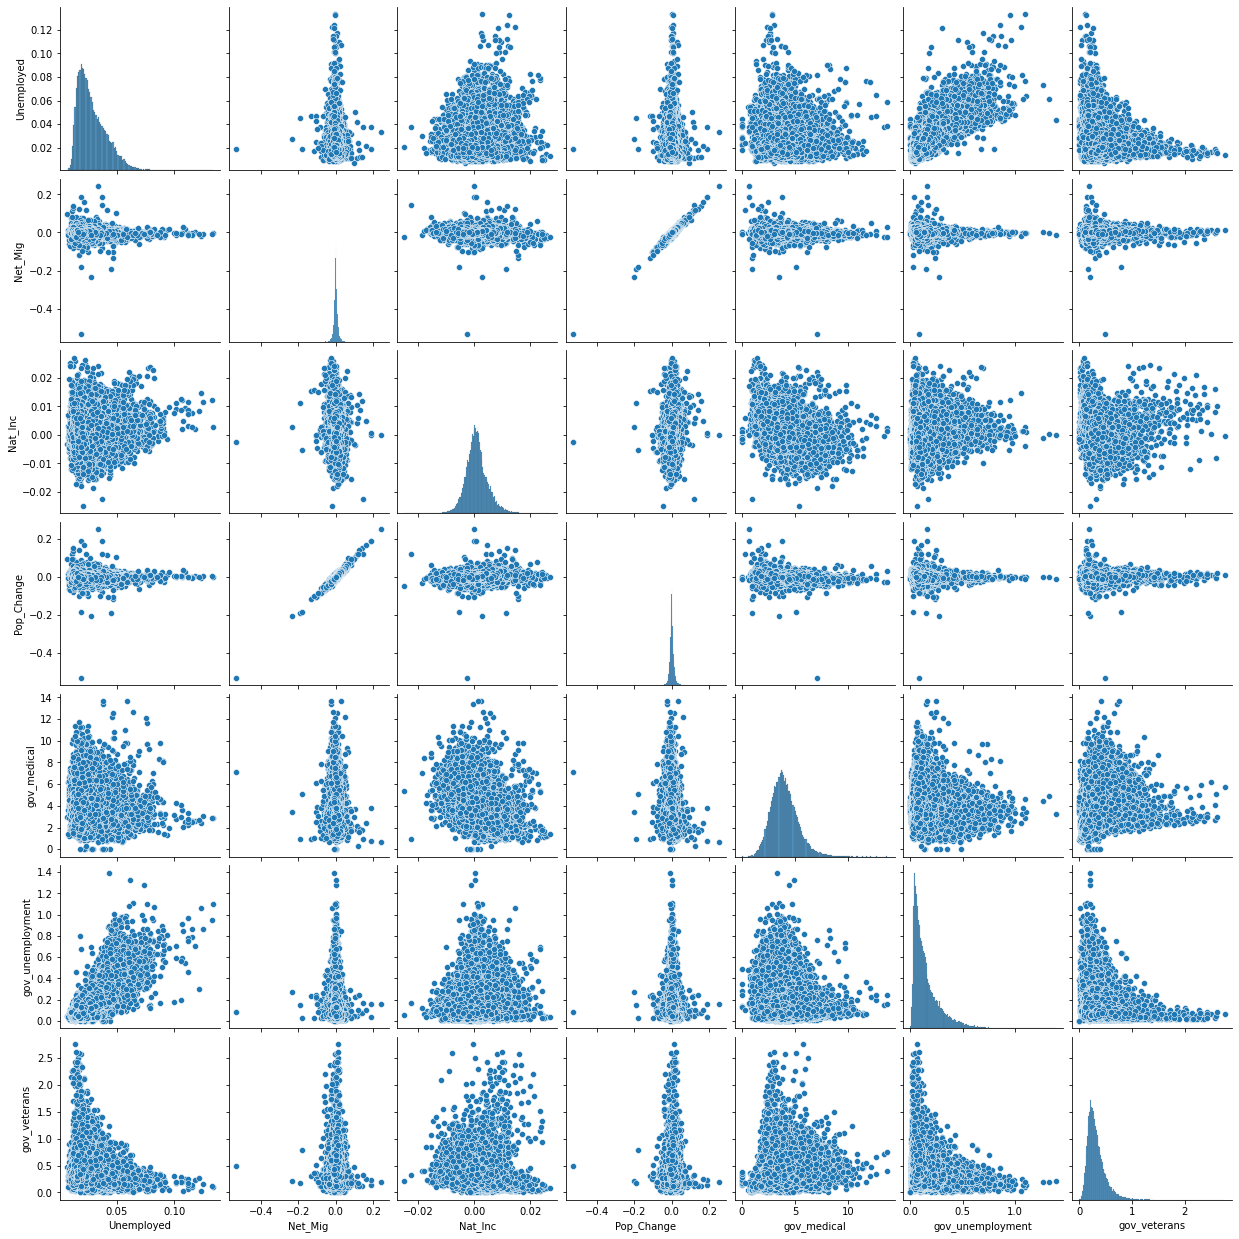

In [10]:
g = sns.pairplot(sub_df)

I am going to explore the regression relationship between unemployment and veterans benefits.

# Prepare Data for Regression

In [11]:
X = sub_df['gov_veterans'].values.reshape(-1,1)
y = sub_df['Unemployed'].values.reshape(-1,1)

In [12]:
X

array([[0.43623683],
       [0.24784285],
       [0.31664654],
       ...,
       [0.35128053],
       [0.43074952],
       [0.68832106]])

In [13]:
y

array([[0.04140726],
       [0.04515269],
       [0.04541296],
       ...,
       [0.0181944 ],
       [0.02075593],
       [0.0166017 ]])

### Split Data into Train and Test Sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a Regression Model

In [15]:
regression = LinearRegression()

In [16]:
regression.fit(X_train, y_train)

LinearRegression()

In [17]:
y_predicted = regression.predict(X_test)

### Plot test set

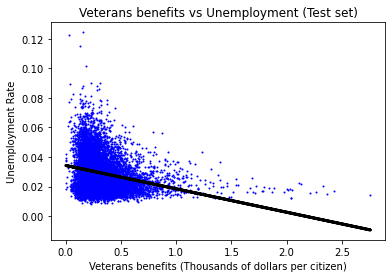

In [18]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 1)
plot_test.plot(X_test, y_predicted, color='black', linewidth =3)
plot_test.title('Veterans benefits vs Unemployment (Test set)')
plot_test.xlabel('Veterans benefits (Thousands of dollars per citizen)')
plot_test.ylabel('Unemployment Rate')
plot_test.show()

The line does not fit the dataset very well.  There is large variability in the dataset at the low end so a linear regression does not appear to be the best model for this situation.

In [19]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test,y_predicted)

In [20]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01584045]]
Mean squared error:  0.000142717520368295
R2 score:  0.0664776282953371


In [21]:
compare_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
compare_df.head(30)

,Actual,Predicted
0,0.010870,0.030372
1,0.040470,0.031013
2,0.029122,0.025217
3,0.019299,0.026744
4,0.033291,0.027154
5,0.022927,0.031067
6,0.017932,0.028835
7,0.013534,0.029551
8,0.087880,0.031847
9,0.031805,0.029258


Linear regression does not fit this dataset very well.  There is too much variability amongst the low levels of veteran benefits to accurately predict unemployment information.  

# Export Data

In [22]:
df.to_pickle(os.path.join(path,'Data','Prepared Data','05_df.pkl'))